# Graph Search 1

- Depth First Search (Stack)
- Breadth First Search (Queue)

In [1]:
from graphviz import Digraph

### Depth First Search (DFS) 
- Finds a path from one node to another -- works on any directed graph

In [2]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

### For a regular graph, you need a new class `Graph` to keep track of the whole graph.
- Why? Remember graphs need not have a "root" node, which means there is no one origin point

In [3]:
class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        # to keep track which nodes have already been visited
        self.visited = set()

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        """
        Automatically adds missing nodes.
        """
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        """
        Draws the graph nodes and edges iteratively.
        """
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def dfs_search_v1(self, src_name, dst_name):
        """
        Clears the visited set and invokes dfs_search using Node object instance
        with name src_name.
        """
        # Q: is this method recursive?
        # A: no, it is just invoking dfs_search method for Node object instance
        #    dfs_search method in Node class is recursive
        #    These methods in two different classes just happen to share the same name
        self.visited.clear()
        return self.nodes[src_name].dfs_search_v1(self.nodes[dst_name])
    
    def dfs_search(self, src_name, dst_name):
        self.visited.clear()
        return self.nodes[src_name].dfs_search(self.nodes[dst_name])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder = None # who found me during BFS
        
    def __repr__(self):
        return self.name
    
    def dfs_search_v1(self, dst):
        """
        Returns True / False when path to dst is found / not found
        """
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return False
        self.graph.visited.add(self)

        if self == dst:
            return True
        
        for child in self.children:
            if child.dfs_search_v1(dst):
                return True
            
        return False

    def dfs_search(self, dst):
        """
        Returns the actual path to the dst as a tuple or None otherwise
        """
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)

        if self == dst:
            return (self,)
        
        for child in self.children:
            child_path = child.dfs_search(dst)
            if child_path != None:
                return (self,) + child_path
        return None

### Testcases for DFS v1

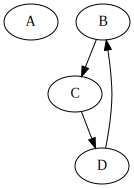

In [4]:
g = example(1)
g

In [5]:
g.nodes["B"].dfs_search_v1(g.nodes["B"])

True

In [6]:
g.nodes["B"].dfs_search_v1(g.nodes["D"]) # should return (B, C, D)

False

In [7]:
g.nodes["B"].dfs_search_v1(g.nodes["A"]) # should return None
# TODO: add visited set to avoid cycle

False

In [8]:
g.nodes["B"].dfs_search_v1(g.nodes["D"]) # should return (B, C, D)
g.nodes["B"].dfs_search_v1(g.nodes["D"]) # should return (B, C, D)
# TODO: add dfs_search in Graph class to clear out visited set before second search

False

In [9]:
print(g.dfs_search_v1("B", "D")) # should return (B, C, D)
print(g.dfs_search_v1("B", "A")) # should return None
print(g.dfs_search_v1("B", "D")) # should return (B, C, D)

True
False
True


### `tuple` review

- similar to lists, but immutable
- defined using `()`
- `*` operator represents replication and not multiplication for lists and tuples
- `+` operator represents concatenation and not additional for lists and tuples

In [10]:
(3+2,) # this is a tuple containing 5

(5,)

In [11]:
(3+2) * 3 # gives us 15

15

In [12]:
# replicates item 5 three times and returns a new tuple
(3+2,) * 3

(5, 5, 5)

In [13]:
# returns a new tuple containing all items in the first tuple and 
# the second tuple
(3, ) + (5, )

(3, 5)

### Testcases for DFS

In [14]:
g.nodes["B"].dfs_search(g.nodes["B"])

In [15]:
g.nodes["B"].dfs_search(g.nodes["D"]) # should return (B, C, D)

In [16]:
g.nodes["B"].dfs_search(g.nodes["A"]) # should return None
# TODO: add visited set to avoid cycle

In [17]:
g.nodes["B"].dfs_search(g.nodes["D"]) # should return (B, C, D)
g.nodes["B"].dfs_search(g.nodes["D"]) # should return (B, C, D)
# TODO: add dfs_search in Graph class to clear out visited set before second search

In [18]:
print(g.dfs_search("B", "D")) # should return (B, C, D)
print(g.dfs_search("B", "A")) # should return None
print(g.dfs_search("B", "D")) # should return (B, C, D)

(B, C, D)
None
(B, C, D)


### Why is it called "*Depth* First Search"?

- we start at the starting node and go as deep as possible because recursion always goes as deep as possible before coming back to the other children in the previous level
- we need a `Stack` data structure:
    - Last-In-First-Out (LIFO)
- recursion naturally uses `Stack`, which is why we don't have to explicitly use a `Stack` data structure
- might not give us the shortest possible path

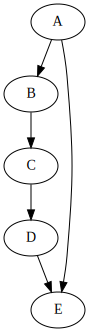

In [19]:
g = example(2)
g

In [20]:
print(g.dfs_search("A", "E")) # should return (A, B, C, D, E)
print(g.dfs_search("E", "A")) # should return None

(A, B, C, D, E)
None
